In [1]:
import psycopg2
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [2]:
client = psycopg2.connect(database="main",
    host="localhost",
    user="user",
    password="pass",
    port="5432"
)

In [5]:
questions_count_per_year = pd.read_sql("""
    SELECT count(id) AS number, extract(year from asked_at) AS years FROM question
    GROUP BY years
    ORDER BY years
""", client)

fig = px.line(questions_count_per_year, x='years', y='number', title="Question count per year")
fig.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_24392\2816262378.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [6]:
questions_count_per_category = pd.read_sql("""
    SELECT count(*) as nb, name FROM question
    JOIN question_category qc ON qc.question_id = question.id
    JOIN category ON qc.category_id = category.id
    GROUP BY name
    ORDER BY nb DESC
    LIMIT 35
""", client)

fig = px.bar(questions_count_per_category, x='name', y='nb', title="Nombre de questions par catégorie")
fig.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_24392\3034025679.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



DatabaseError: Execution failed on sql '
    SELECT count(*) as nb, name FROM question
    JOIN question_category qc ON qc.question_id = question.id
    JOIN category ON qc.category_id = category.id
    GROUP BY name
    ORDER BY nb DESC
    LIMIT 35
': could not resize shared memory segment "/PostgreSQL.2937160760" to 33554432 bytes: No space left on device


In [33]:
CATEGORY = "docker"
similars = pd.read_sql("""
    select count(*) as nb, c.name from question_category qc
    join question_category qc1 on qc.question_id = qc1.question_id
    join category c on qc1.category_id = c.id
    join category c1 on qc.category_id = c1.id
    where c1.name = %(category)s and qc.id <> qc1.id
    group by c.name
    order by nb desc
    limit 25
""", client, params={"category": CATEGORY})

total = np.sum(similars["nb"])
similars["percent"] = similars["nb"] / total * 100

fig = px.bar(similars, x='name', y='percent', title="Categories similar to " + CATEGORY)
fig.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_24392\4144967982.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [12]:
TECHO = "docker"

questions_count_per_year = pd.read_sql("""
    select count(q.id) as nb, extract(year from asked_at) as years from question q
    join question_category qc on qc.question_id = q.id
    join category c on c.id = qc.category_id
    where c.name = %(techno)s
    group by years
    order by years
""", client, params={"techno": TECHO})

fig = px.line(questions_count_per_year, x='years', y='nb', title="Question count per year related to " + TECHO)
fig.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_24392\2050764135.py:3: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [32]:
TECHO = "java"

questions_count_per_day = pd.read_sql("""
    select count(q.id) as nb, date_part('isodow', asked_at) as weekday from question q
    join question_category qc on qc.question_id = q.id
    join category c on c.id = qc.category_id
    where c.name = %(techno)s
    group by weekday
""", client, params={"techno": TECHO})

days = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]
questions_count_per_day["day"] = questions_count_per_day["weekday"].apply(lambda x: days[int(x)-1])

fig = px.bar(questions_count_per_day, x='day', y='nb', title="Question count per week day for " + TECHO)
fig.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_24392\961879995.py:3: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



C:\Users\charl\AppData\Local\Temp\ipykernel_24392\1904104931.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\charl\AppData\Local\Temp\ipykernel_24392\1904104931.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\charl\AppData\Local\Temp\ipykernel_24392\1904104931.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\charl\AppData\Local\Temp\ipykernel_24392\1904104931.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 conn

Text(0.5, 1.0, 'Tech popularity over time')

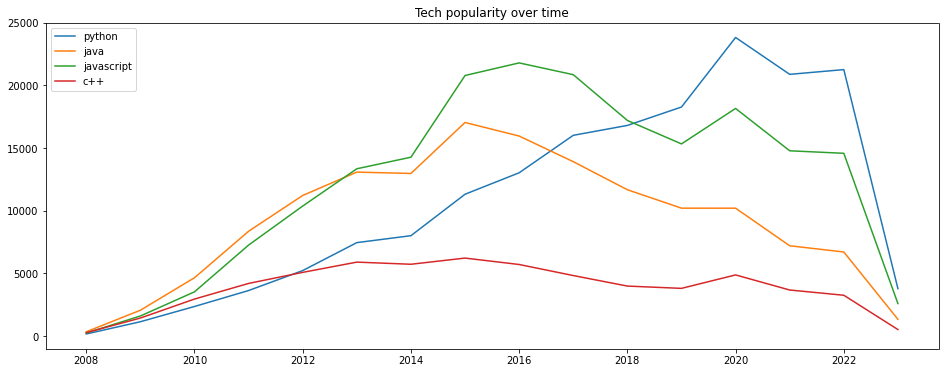

In [35]:
TECHOS = ["python", "java", "javascript", "c++"]
df = pd.DataFrame()

plt.figure(figsize=(16,6))
for tech in TECHOS:
    data = pd.read_sql("""
        select count(q.id) as nb, extract(year from asked_at) as years from question q
        join question_category qc on qc.question_id = q.id
        join category c on c.id = qc.category_id
        where c.name = %(tech)s 
        group by years
        order by years
    """, client, params={"tech": tech})

    plt.plot(data["years"], data["nb"], label=tech)
plt.legend()
plt.title("Tech popularity over time")